# Semiconductors

## Band Theory of Solids
There are three categories of solids, based on their conduction properties: conductors, semiconductors, and insulators.  The electrical conductivity at room temperature is quite different for each of these three kinds of solids.  In order from highest to lowest conductivity is metals and alloys; semiconductors, and insulators.

The free electorn model does not apply to semiconductors and insulators.  These materials lack enough free electrons to conduct in a free-electron mode.  If the electirical conductivity of semiconductors is about $10$ orders of magnitude lower, could it be that the charge carrier density is lower by that factors?

That is only part of the story, where there is a differnt conduction mechanism for semiconductors than for normal conductors.  Although free-electron theory predicts a linear increase in resistivity with temperature, semiconductors generally exhibit *decreasing* resistivity with increasing temperature.

**Band theory** is needed to account for the temperature dependence and other properties of semiconductors.  In band theory, the allowed energy states for electrons are nearly continuous over certain ranges (i.e., **energy bands**) with forbidden **energy gaps** between the bands.  

Let's consider what happens when two atoms of hydrogen are brought together; hydrogen is used only because we conveniently know its wave function, but any other element could have been chosen.  

- When the two atoms are far apart, the electronic wave functions can be treated as noninteracting.  
- As the atoms are brought closer together, the wave functions begin to overlap.

Because any linear combination of wave functions is possible, there can be either a symmetric or antisymmetric overlap.  These two situations correspond to slightly different energies.  An electron in the symmetric state $(\Psi_A + \Psi_B)$ has a nonzero probability of being halfway between the two atoms, whereas an electron in the antisymmetric state $(\Psi_A + \Psi_B)$ has a zero probability of begin at that location.

This causes the binding to be slightly stronger in the symmetric case, and hence the energy of that state is lower.  As a result, there is a splitting of all possible energy levels $(1s,\ 2s,\ \ldots)$.  In each case the symmetric state has the lower energy.

When more atoms are added, there is a further splitting of energy levels.  With a large number of atoms, the levels are split into nearly continuous energy bands, with each band consisting of a number of closely spaced energy levels.  

An energy gap may or may not exist between bands, depending onthe type of atom (or atoms) in the solid, lattice spacing, lattice structure, temperature, and an number of other factors.

### Kronig-Penney Model
An effectinve way to understand the energy gap in semiconductors is to model the interaction betwen the electrons and the lattice of atoms.  This interaction is more important in semiconductors because much higher resistivity implies tighter binding and/or more interaction.  [Ralph de Laer Kronig](https://en.wikipedia.org/wiki/Ralph_Kronig) and [William Penney](https://en.wikipedia.org/wiki/William_Penney,_Baron_Penney) developed a useful 1-D model of the electron lattice interaction in 1931.

They assumed that an electron experiences a potential like a square-wave, or in infinite 1-D array of finite potential wells.  Each potential well represents an atom in the lattice, so the size of the wells must roughly correspond to the lattice spacing.

The Kronig-Penney method for finding the allowed energy levels follows the method of barrier tunneling (see barriers and tunneling in [Chapter 6](https://saturnaxis.github.io/ModernPhysics/Chapter_6/quantum-mechanics-part2.html#barriers-and-tunneling)).  The electrons are not free.  We assume that the total energy $E$ of an electron is less than the height $V_o$ of each barrier/well in the Kronig-Penney potential.  The electron is essentially free in the gap $0<x <a$, where it has a wave function of the form

\begin{align}
\psi = Ae^{ikx} + Be^{-ikx},
\end{align}

where the wave number $k$ is given by the usual relation $k^2 = 2mE/\hbar^2$.  In the barrier region $a<x<a+b$, the electron can tunnel through.  This means that the wave function loses its sinusoidal character and becomes

\begin{align}
\psi = Ce^{\kappa x} + De^{-\kappa x},
\end{align}

with $\kappa^2 = 2 m\left(V_o - E\right)/\hbar^2$.

Kronig and Penney used the technique of matching wave functions and their first derivatives at the various boundaries.  Application of the appropriate boundary conditions yields the relation

```{math}
:label: boundary_eqn
\frac{\kappa^2b}{2k}\sin{(ka)} + \cos{(ka)} = \cos{(Ka)},
```

where $K$ is another wave number.

In the python script below, you can see the left hand side (LHS) of Eq. {eq}`boundary_eqn` plotted against the argument $ka$ for $\kappa^2 ba/2 = 3\pi/2$.  Because the sine and cosine funcitons are restricted to ${-1,1}$, the relation in Eq. {eq}`boundary_eqn` cannot be satisfied for all values of $\kappa$ and $k$.  The right hand side (RHS) of Eq. {eq}`boundary_eqn` is also restricted to ${-1,1}$, which leads to **forbidden zones** for the wave numbers, or gaps in the corresponding energies.

The gaps occur regularly at $ka = n\pi$, for integer values of $n$.  With $k = n\pi/a = 2\pi/\lambda$, we see that $\lambda = 2a/n$.  Twice the lattice spacing $(2a)$ correponds to an integer multiple of the free-particle wavelength $(n\lambda)$, and a free particle with this wavelength would be reflected by the lattice.

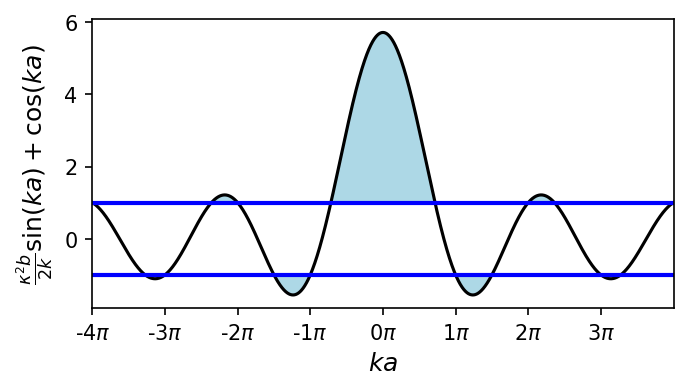

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 

ka_L = np.arange(-4*np.pi,4*np.pi,0.01) # k = np.arange(...)/a
#kappa^2 ba/2 = 3\pi/2 --> kappa^2 ba/(2*np.arange(..))
fact = 3*np.pi/(2*ka_L)
LHS = fact*np.sin(ka_L) + np.cos(ka_L)
Ka_R = np.arange(0,5*np.pi,0.01)
RHS = np.cos(Ka_R)

fig = plt.figure(figsize=(5,2.5),dpi=150)
ax1 = fig.add_subplot(111)

ax1.plot(ka_L/np.pi,LHS,'k-',lw=1.5)
ax1.axhline(1,color='b',lw=2)
ax1.axhline(-1,color='b',lw=2)
ax1.fill_between(ka_L/np.pi,LHS,1,where=LHS>1,color='lightblue')
ax1.fill_between(ka_L/np.pi,-1,LHS,where=LHS<-1,color='lightblue')

ax1.set_xticks(np.arange(-4,4,1))
ax1.set_xticklabels(['%i$\\pi$'% f for f in range(-4,4)])
ax1.set_xlim(-4,4)

ax1.set_xlabel("$ka$",fontsize='large')
ax1.set_ylabel("$\\frac{\kappa^2 b}{2k}\sin(ka) + \cos(ka)$",fontsize='large');

There are some differences between our simplified Kronig-Penney model and the single potential well from [Chapter 6](https://saturnaxis.github.io/ModernPhysics/Chapter_6/quantum-mechanics-part2.html#barriers-and-tunneling)).

1. For an infinite lattice, the allowed energies within each band are continuous rather than discrete.  In a real crystal the lattice is not infinite.  Even if the chains are only thousands of atoms long, the allowed energies are nearly continuous.
2. In a real 3-D crystal it is appropriate to speak of a **wave vector** $\vec{k}$ (i.e., contains a direction and magnitude).  The allowed ranges for $\vec{k}$ constitute the [**Brillouin zones**](https://en.wikipedia.org/wiki/Brillouin_zone).
3. In a real crystal, the potential funciton is somewhat more complicated than the Kronig-Penney squares.  As a result, the energy gaps are not uniform in size.  The gap sizes may be changed by impurities or imperfections of the lattice.

These differences are important as we try to understand the electronic behavior of semiconductors.

### Band Theory and Conductivity
Good conductors (e.g., copper) are understood using the free-electron model. 

- It is also possible to make a conductor using a material with its highest band filled, in which case no electron in that band can be considered free.  
- If the filled band overlaps with the next higher band (i.e., effectively there is no gap between the two bands), then an applied electric field can make an electron from the filled band jump to the higher level.
- This allows conduction to take place, although typically with slightly higher resistance than in normal metals. Such materials are called **semimetals** (e.g., arsenic, bismuth, and antimony).

The band structures of insulators and semiconductors resemble each other qualitatively.  Normally there exists (in both insulators and semiconductors) a filled energy band known as the **valence band**, which is separated from the next higher band called the **conduction band** by an energy gap.

If the gap is at least several electron volts ($\rm eV$), the material is an insulator.  It is too difficult for an applied field to overcome that large energy gap, and thermal excitations lack the energy to promote sufficient numbers of electrons to the conduction band.  

But if the energy gap is smaller (${\sim}1\ {\rm eV}$), it is possible for enough electrons to be excited into the conduction band.  Therefore, an applied electric field can produce a modest current.  The result is a semiconductor.

## Semiconductor Theory
At $T=0$, we expect all of the atoms in a solid are in the ground state.  The distribution of electrons (i.e., fermions) at the various energy levels is described by the Fermi-Dirac distribution:

$$ F_{\rm FD} = \frac{1}{e^{\beta(E-E_{\rm F})}+1}, $$

where $\beta = 1/(kT)$ and $E_{\rm F}$ is the Fermi energy.  Atoms are found in the excited states when the temperature is increased from $T=0$.

The increased number of electrons in excited states explains the temperature dependence for the resistivity of semiconductors.  Only those electrons that have jumped from the valence band to the conduction band are available to participate in the conduction process in a semiconductor.  As the temperature increases, more electrons are found in the conduction band, but the resistivity decreases.

A couple of observations about the Fermi-Dirac factor:

1. The energy $E$ in the exponential factor makes it clear why the band gap is so crucial.  An increase in the band gap by a factor of 10 will (for a given temperature) increaes the value of $e^{\beta E}$ by a factor of $e^{9\beta E}$.  This makes the factor $F_{\rm FD}$ so small that the material has to be an insulator.
2. One may expect the resistance of a semiconductor to decrease exponentially with increasing temperature.  This is approximately true, but the function $F_{\rm FD}$ is not a simple exponential and the bad gap varies with temperature.


A useful empirical expression developed by [Clement & Quinnell (1952)](https://pubs.aip.org/aip/rsi/article-abstract/23/5/213/298007/The-Low-Temperature-Characteristics-of-Carbon) for the temperature variation of standard carbon resistors is

\begin{align}
\log{R} + \frac{K}{\log{R}} = A + \frac{B}{T},
\end{align}

where $A$, $B$, and $K$ are constants.  When the above equation is plotted against $1/T$, straight lines are seen up to $1/T \sim 0.6$, which allows us to conclude that the Clement-Quinnell equation is accurate down to $T \approx 1/0.6\ {\rm K} = 1.7\ {\rm K}$.  

In a plot of resistance versus temperature, the variation of $R$ with $T$ is rapid in the low-temperature range ($0\leq T \lesssim 20\ {\rm K})$ for semiconductor materials.  For this reason, carbon and other semiconductors are widely used as resistance thermometers ("thermistors") in low-temperature physics.


```{exercise}
:class: orange

**Find the relative number of electrons with energies $0.10$, $1.0$, and $10\ {\rm eV}$ above the valence band at room temperature $(293\ {\rm K})$.**

Since we have only energies and temperatures, it makes sense to use the Fermi-Dirac distribution for this comparison.  Also, we will use an alternative form of Boltzmann's constant $k = 8.617 \times 10^{-5}\ {\rm eV/K}$ to make the calculation a little easier.  

In the Fermi-Dirac distribution $E_{\rm F}$ is the Fermi energy, but $E-E_{\rm F}$ represents the energy *above* the valence band.  To simplify the expression, we first calculate $kT = (8.617 \times 10^{-5}\ {\rm eV/K})(293\ {\rm K}) = 0.02525\ {\rm eV}$. Therefore, we can proceed with a simple substitution to get:

\begin{align}
F_{\rm FD}(0.10\ {\rm eV}) &= \frac{1}{e^{(0.1\ {\rm eV})/(0.02525\ {\rm eV})}+1} = 0.0187, \\
F_{\rm FG}(1.0\ {\rm eV}) &= \frac{1}{e^{(1\ {\rm eV})/(0.02525\ {\rm eV})}+1} = 6.30 \times 10^{-18}, \\
F_{\rm FG}(10\ {\rm eV}) &= \frac{1}{e^{(10\ {\rm eV})/(0.02525\ {\rm eV})}+1} = 9.86 \times 10^{-173}.
\end{align}

This example demonstrates how strongly the Fermi-Dirac factor depends on the size of the band gap, $E-E_{\rm F}$.  The number of electrons available for conduction drops off sharply as the band gap increases.
```

In [37]:
import numpy as np
from scipy.constants import physical_constants 

def Fermi_Dirac(deltaE,k,T):
    #calculate the relative number of electrons above the valence band
    return 1./(np.exp(deltaE/(k*T))+1)

k_eV = physical_constants['Boltzmann constant in eV/K'][0]
T_room = 293 #room temperature in K

Evals = [0.1, 1, 10] #energies delta E = E-E_F
for E in Evals:
    print("The relative number of electrons at room temperature for delta E = %1.1f is %1.3e." % (E,Fermi_Dirac(E,k_eV,T_room)))

The relative number of electrons at room temperature for delta E = 0.1 is 1.870e-02.
The relative number of electrons at room temperature for delta E = 1.0 is 6.301e-18.
The relative number of electrons at room temperature for delta E = 10.0 is 9.861e-173.


When electrons move into the conduction band, they leave behind vacancies (or **holes**) in the valence band.  The holes represent the absence of negative charges, where it can be useful to think of them as positive charges.  Electrons move in a direction *opposite* to the applied electric field, but holes move in the direction of the electric field.

```{note}
A semiconductor with a balance between the number of electrons in the conduction band and the number of holes in the valence band is called an **intrinsic semiconductor**, such as pure carbon and germanium.
```

It is possible to fine-tune a semiconductor's properties by adding a small amount of material (called a *dopant*) to the semiconductor.  The resulting compound is called an **impurity semiconductor**.  This happens when we add a small amount of arsenic to silicon.  Each arsenic atom replaces a silicon atom in the lattice.  *What does this do to the conductive properties of the material?*

Notice that silicon has four electrons $(3s^23p^2)$ in its outermost shell (i.e., the valence band) and arsenic has five electrons $(3s^24p^3)$. Arsenic's fifth electron is very weakly bound, where the other for outer-shell electrons participate in covalent bonding with its nearest neighbor (just as another silicon atom would).  It only takes $0.05\ {\rm eV}$ to move the extra electron into the conduction band.  Adding only a small amount of arsenic to silicon greatly increases the electrical conductivity.

```{note}
The addition of arsenic to silicon creates an $\mathbf{n}$**-type** semiconductor ($n$ for negative) because electrons close to the conduction band will easily conduct current.  The new arsenic energy levels just below the conduction band are called **donor levels** because an electron there is easily donated to the conduction band.
```

Consider what happens when indium $(5s^25p^1)$ is added to silicon.  Indium has one less electron in its outer shell than silicon, which results in one extra hole per indium atom.  The existence of these holes creates extra energy levels just above the valence band because it takes very little energy to move another electron into a hole.

Those new indium levels are called **acceptor levels** because they easily accept an electron from the valence band.  The result is an increased flow of current (or lower electrical resistance) as the electrons fill holes under an applied electric field.

```{note}
It is easier to think in terms of the flow of positive charges (holes) in the direction of the applied field, so we cal this a $\mathbf{p}$**-type** semiconductor ($p$ for positive).
```

There are many **compound semiconductors**, which consist of equal numbers of two kinds of atoms.  Examples include $\rm GaAs,\ InP,\ GaN,\ SiC,\ \text{and}\ InSb$. In a compound semiconductor, a mixed form of covalent and ionic bonding creates the same type of tetrhedral bonding as pure $\rm Ge$ and $\rm Si$.  Compound semiconductors have band gaps and can be doped like intrinsic semiconductors to form $p$-type and $n$-type semiconductors.

One may be skeptical when we introduce a so-called "positive current" and ask to what extent the holes are real.  It can be shown experimentally (using the normal Hall effect) that $p$-type materials really do behave as if the charge carriers were positive.  The magnitude and sign of the Hall voltage allow one to calculate the density and sign of the charge carriers in a conductor (or semiconductor) and verigy that charges in $p$-type and $n$-type materials have different signs.

```{note}
Benjamin Franklin popularized the "single-fluid" model of electricity, where Franklin considered electrical forces as the result of excesses ("positive") and deficiencies ("negative") of an electrical fluid.  His designation is rather arbitrary, and if he had chosen the reverse, electrons would be positive.
```

### Thermoelectric Effect
When there is a temperature gradient in a thermoelectric material, an electric field appears which we call the [**thermoelectric effect**](https://en.wikipedia.org/wiki/Thermoelectric_effect).  It's easier to understand why this happens in a pure metal, where we can assume a gas of free electrons.

As in an ideal gas, the density of free electrons is greater at the colder end of the wire, and the electrical potential is higher at the warmer end (and lower at the colder end).  Since the conducting properties are temperature dependent, it is reasonable that semiconductors should exhibit a thermoelectric effect (even though the free-electron modle is not valid for semiconductors).

In 1-D the induced electric field $E$ in a semiconductor is propotional to the temperature gradient, or

\begin{align}
E = Q \frac{dT}{dx},
\end{align}

where $Q$ is the **thermoelectric power**.  The direction of the induced field depends on whether the seminconductor is $p$- or $n$-type.  As a result, the thermoelectric effect can be used to determine the extent to which $n$- or $p$-type carriers dominate in a complex system.

The thermoelectric effect (sometimes called the [**Seebeck effect**](https://en.wikipedia.org/wiki/Thermoelectric_effect#Seebeck_effect)) that demonstrates the type of semiconductor is the most commonly used thermoelectric effect.  However, there are two others.

1. In a normal conductor, heat is generated at the rate $I^2R$, but a temperature gradient across the conductor causes additional heat to be generated.  The is known as the [**Thomson effect**](https://en.wikipedia.org/wiki/Thermoelectric_effect#Thomson_effect) and is entirely reversible (strangely enough).  
    - If the direction of the current is toward the higher temperature end, heat is generated.
    - If the current flows toward the lower temperature end, heat is absorbed from the surroundings.
2. The [**Peltier effect**](https://en.wikipedia.org/wiki/Thermoelectric_effect#Peltier_effect) occurs when heat is generated at a junction between two conductors as current passes through the junction.

An application of the Seebeck effect i in thermometry.  The thermoelectric power of a given conductor varies as a function of temperature, and the variation can be quite different for two different conductors.  This difference makes possible the operation of a [**thermocouple**](https://en.wikipedia.org/wiki/Thermocouple).

Two conductors $A$ and $B$ are joined at each end, where one end is held at a reference temperature $T_o$ and the other is placed as some unknown temperature $T$.  The differential thermopowers of $A$ and $B$ cause a voltage $V_{AB}$ to be induced between the two ends of the thermocouple.  Knowing the temperature variation of each thermopower allows one to calculate the temperature difference $T-T_o$ (and deduce the unknown temperature $T$) as a function of $V_{AB}$.

In practice, it is not necessary to measure thermopowers to use a thermocouple.  Well-established tables (see [Table 7](https://www.pyromation.com/downloads/data/temperature-tables.pdf)) for voltage versus temperature can be found in many handbooks for different conductiong pairs over wide ranges of temperature.

## Semiconductor Devices

### Diodes
When $p$-type and $n$-type semiconductors are joined together, they make a simple device known as a $\mathbf{pn}$**-junction diode**.  The principal characteristic of a $pn$-junction diode is that it allows current to flow easily in *one* direction but hardly at all in the other direction.

When no external voltage is applied it is the **no bias** case.  Free electrons from the $n$ side drift through random motion to the $p$ side, and their migration leaves a small net positive charge on the $n$ side.  

- The flow of electrons is called the electron recombination current $I_r$.  Equilibrium is achieved very quickly because the potential difference created by the charge migration tends to prohibit further migration.  
- There is typically a small current of electrons from the $p$ side to the $n$ side because electrons on the $p$ side can be thermally excited (at normal temperatures) from the valence band to an acceptor level.  
- The thermal electron current is designated as $I_t$.  

With no external voltage source, the net electron current is zero (i.e., cancels out) where $I_t=I_r$, preserving the equlibrium.

In the **reverse bias** case, a potential difference is applied across the junction.  In a normal conductor, electrons would tend to flow freely from the negative toward the positive terminal.  But in the $pn$ junction, there remains the tendency for electrons to drirt back from the $n$ side toward the $p$ side whenever an imbalance is created.  The result is only a small net flow of electrons from the $p$ side to the $n$ side (i.e., a small positive current from the high- to low-potential side of the battery).

In the **forward bias** case, a potential difference is applied with the positive terminal connected to the $p$ side and the negative terminal to the $n$ side of the junction.  Electrons are pushed the way they would tend to move anyway.  The only compensating factor (e.g., thermal flow of electrons) is too small to retard the electron flow.  The result is a steady flow of positive current from higher to lower potential, inhibitied only by the natural resistance of the device.

Using the tools of statistical physics, we can model the $I-V$ characteristics of the $pn$-junction diode and obtaion a quantitative justification of the empirical curve.  Starting with the *no bias* case, where there is still a potential difference $V_o$ present between the two sides and a corresponding current $I_o$ due to the presence of holes on one side and electrons on the other.

Let $N$ be the number of electrons present in the conduction band on the $n$ side.  At room temperature, Maxwell-Boltzmann statistics are sufficient to describe the electron behavior.  In the no-bias case, the number of electron able to move from the $n$ to the $p$ side is proportional to $Ne^{-e(V_o-V)/(kT)} = Ne^{-eV_o/(kT)}e^{eV/(kT)}$.

The electron current under forward bias must be $I = I_oe^{eV/(kT)}$ because there is still an additional current $-I_o$ in the forward bias due to the motion of holes.  The total current in forward bias is

\begin{align}
I = I_o \left(e^{eV/(kT)} - 1\right),
\end{align}

which is a good approximation of the $I-V$ empirical curve (see python code below).

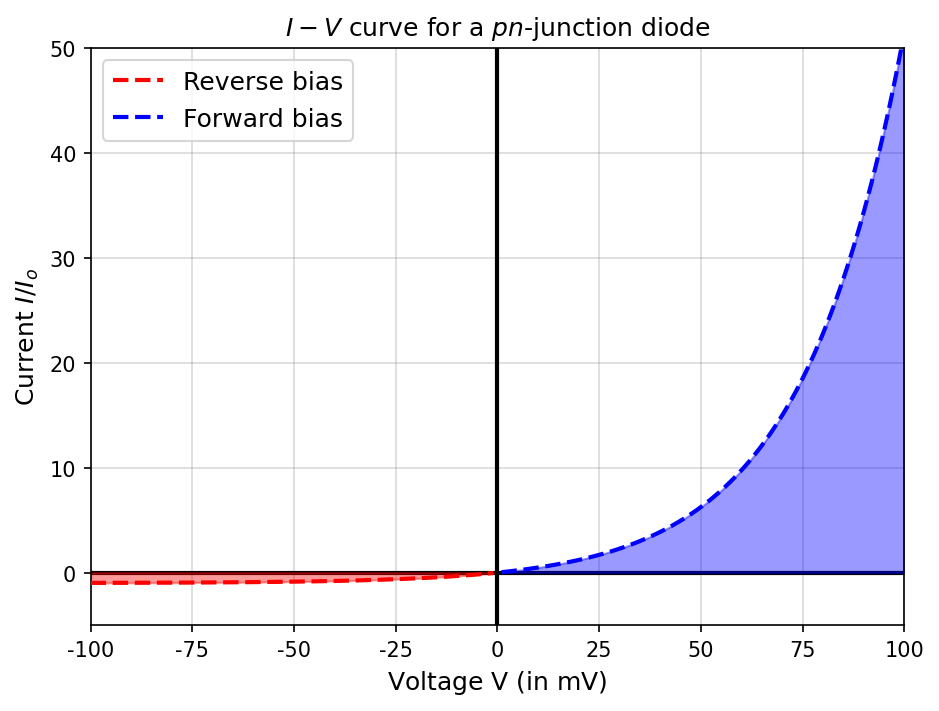

In [79]:
import numpy as np
from scipy.constants import physical_constants,k,e

def bias_current(V,k,T):
    #return the normalized forward bias current
    return np.exp(e*V/(k*T)) - 1

T_room = 293 #room temperature in K
fs = 'large'
V = np.arange(-100,101,1)*0.001 #voltage in volts

fig = plt.figure(figsize=(7,5),dpi=150)
ax = fig.add_subplot(111)

y = bias_current(V,k,T_room)
ax.plot(V[V<0],y[y<0],'r--',lw=2,zorder=5,label='Reverse bias')
ax.plot(V[V>0],y[y>0],'b--',lw=2,zorder=5,label='Forward bias')
ax.axhline(0,lw=2,color='k')
ax.axvline(0,lw=2,color='k')
ax.fill_between(V[V<0],0,y[y<0],color='r',alpha=0.4,zorder=2)
ax.fill_between(V[V>0],y[y>0],color='b',alpha=0.4,zorder=2)

ax.legend(loc='best',fontsize=fs)
ax.set_ylabel("Current $I/I_o$",fontsize=fs)
ax.set_xlabel("Voltage V (in $\\rm mV$)",fontsize=fs)
ax.set_title("$I-V$ curve for a $pn$-junction diode",fontsize=fs)
ax.grid(True,color='gray',ls='-',alpha=0.3)
ax.set_xlim(-0.1,0.1)
ax.set_xticks(np.arange(-0.1,0.125,0.025))
ax.set_xticklabels(["%i" % f for f in range(-100,125,25)])
ax.set_ylim(-5,50);

### Rectifiers
The diode is an important tool in many kinds of electrical circuits.  Consider the [**bridge rectifier**](https://en.wikipedia.org/wiki/Diode_bridge), which is set up so that it allows current to flow in only one direction through the resistor $R$ when an AC (alternating current) supply is placed across the bridge.  The current through the resistor is then a *rectified* sine wave of the form:

\begin{align}
I = I_{\rm max}\left|\sin{(\omega t)}\right|.
\end{align}

This is the first step in changing AC to DC (direct current).  The design of a power supply can be completed by adding capacitors and resistors in appropriate proportions.  The rectificier is important because many of our devices need DC, where we receive AC from our wall sockets.  Another common application is in car alternators, where they are used to charge the car's battery.

### Zener Diodes
The [**Zener diode**](https://en.wikipedia.org/wiki/Zener_diode) is made to operate under reverse bias once a sufficiently high voltage has been reached.  The $I-V$ curve of a Zener diode is different thatn for the $pn$-junction diode, where it has a sharp decline in the reverse bias.  This current arises when a large reverse bias voltage is reached and the current increases (becomes more negative) at a very high rate.

Depending on which semiconductor materials are used to make the diode, the Zener $I-V$ phenonomenon can occur in one of two ways.

1. For a *Zener breakdown*, the applied voltage induces electrons from the valence band on the $p$ side to move to the conduction band on the $n$ side.  Once a high reverse bias voltage is reached, large numbers of electrons are pulled immediately into the conduction band.  This accounts for the sudden breakdown.
2. For an *avalanche multiplication*, the applied voltage is high enough to accelerate electrons to energies sufficient to ionize atoms through collision.  The "avalanche" occurs when electrons released in this process are accelerated and ionize other atoms.  This happens rather suddenly, which accounts for a sharp increase in current at a particular voltage.  

In heavily doped material, Zener breakdown is likely to occur first.

A common application of Zener diodes is in regulated voltage sources, which are components in many electronic instruments.  

- To regulate the voltage, we operate on the steep part of the $I-V$ curve sot that any change (e.g., increase) in the supply voltage $V$ tends to be compensated for by a sharp increase in the current through the Zener diode.
- The voltage across the resistor increases, which tends to keep the output voltage $V_Z = V-IR$ fairly constant.

### Light-Emitting Diodes (LEDs)
Another important kind of diode is the [**light-emitting diode**](https://en.wikipedia.org/wiki/Light-emitting_diode) (LED).  Whenever an electron makes a transition from the conduction band to the valence band (i.e., filling a hole), there is a release of energy in the form of a photon.  In some materials the energy levels are spaced so that the photon is in the visible portion of the EM spectrum.  The continuous flow of current through the LED results in a continuous stream of *nearly* monochromatic light.

LEDs are ubiquitious today including the displays for PCs, TVs, car dashboards, car lights, and traffic signals.  The LED can also be a principal component of a laser, where photons released from the LED are used to stimulate the emission of other photons.

### Photovoltaic Cells
Solar cells (or [**photovoltaic cells**](https://en.wikipedia.org/wiki/Solar_cell)) take incoming light energy and turns it into electrical energy.  A good way to think of the solar cell is to consider the LED in reverse.  

> A $pn$-junciton diode absorbs a photon, where the photon's energy is isued to promote an electron from the valence band to the conduction band.

In doing so, both a conducting electron and a hole are created.  If a circuit is connected to the $pn$-junction, the motion of holes and electrons creates an electric current with positive current flowing from the $p$ to $n$ side.

The photovoltaic effect was first observed in 1839 by [Alexandre-Edmond Becquerel](https://en.wikipedia.org/wiki/Edmond_Becquerel), but it remained a curiosity among scientists for more than 100 years.  In the 1954, a silicon-based solar cell (with an efficiency of $6\%$) was made at [Bell Laboratories](https://en.wikipedia.org/wiki/Bell_Labs).  Later advances in design and manufacture of semiconductor devices have increased the efficiences to more than $20\%$ by using both silicon and gallium arsenide solar cells.

The most widely used and studied photovoltaic materials are silicon-based, where manufacturing technology exists to make large single crystals of silicon.  Unfortunately, the cost of making good single crystals of silicon is prohibitive.  The cost of making cells with polycrystalline and amorphous silicon is lower, but so is the efficiency of such cells.

Other thin-film materials can approach the efficiency of silicon devices, where the prime candidate is $\rm GaAs$ and its alloys (including $\rm AlGaAs,\ InGaAs,\ \text{and } AlGaP$).  A device with $32\%$ efficiency was made on a $\rm GaAs$ substrate, where single crystals of $\rm GaAs$ are made fairly inexpensively by growing them on single crystals of $\rm Ge$.  

An advantage of $\rm GaAs$ is that it makes uses the solar spectrum more efficiently than silicon.  The use of multiple layers has been successful, where each layer sensitive to a different wavelength range.  

- The upper layer semimconductor $(\rm GaAs)$ has a band gap of $1.42\ {\rm eV}$, which corresponds to a wavelength $\lambda = 875\ {\rm nm}$ and is in the near infrared portion of the spectrum.  
- The lower layer is made of $\rm GaSb$ with a band gap of $0.72\ {\rm eV}$ corresponding to a wavelength $\lambda = 1730\ {\rm nm}$.

Photons with wavelengths shorter than $875\ {\rm nm}$ have sufficient energy to boost an electron from the valence to the conduction band in $\rm GaAs$, and the top layer is able to use near-IR, visible, and UV solar radiation to produce energy.  Less-energetic IR photons make it thorugh to the $\rm GaSb$ layer, where they can be absorbed and convered to current if their wavelength is $< 1730\ {\rm nm}$.

The use of solar energy has some intrinsic advantages and disadvantages compared with other sources.  The net cost of energy from solar cells is generally high compared to more common alternatives using the [levelized full system cost of electricity](https://en.wikipedia.org/wiki/Cost_of_electricity_by_source#Bank_of_America_(2023)) (LFSCOE) approach.

The primary advantages are:
1. Lower environmental waste in their use and manufacture.
2. Lower emissions while in operation; zero emissions if not supplemented with another source.
3. Scalable manufacture, where large arrays can be used to power cities and smaller arrays for directly powering homes (and small businesses).

The principal (and significant) disadvantages are:
1. It is not always sunny;
2. The produced energy doesn't always meet the current demand, which necessitates a energy storage facility (e.g., chemical, thermal, and gravitational batteries).  The environmental benefits may be canceled out by the type of energy storage method.

Other kinds of solar-energy technology do not use semiconductor materials.  Many buildings are designed to use "passive" solar energy, where letting the sun heat the inside air directly.  Other systems use the sun to heat water that is then piped through the building for radiant heating.  Large-scale power plants with arrays of troughs with parabolic mirrors are used to focus the sun's rays onto water filled tubes.  The water is boiled and its steam is used to power electric turbines.


### Transistors
**Transistors** amplify voltages of currents in many kinds of circuits.  The first transistor was developed in 1948 by [John Bardeen](https://en.wikipedia.org/wiki/John_Bardeen), [William Shockley](https://en.wikipedia.org/wiki/William_Shockley), and [Walter Brattain](https://en.wikipedia.org/wiki/Walter_Houser_Brattain).

Consider the $\mathbf{npn}$**-junction transistor**, which consists of a thin layer of $p$-type semicondcutor sandwiched between two $n$-type semiconductors.  The three terminals (one on each semiconducting material) are known as the **collector**, **emitter**, and **base**.  A good way of thing of this transistor is to think of two $pn$-junction diodes back to back.  

- The emitter side consists of a diode in forward bias.
- The collector side consists of a diode in reverse bias.
- The base is the $p$ side of each diode.

If the emitter is more heavilty doped than the base, then there is a heavy flow of electrons from left to right into the base.  The base is made thin enough so that virtually all of those electrons can pass through the collector and into the output portion of the circuit.  As a result, the output current is a very high fraction of the input current.

Because the base-collector combination is essentiall a diode connected in reverse bias, the voltage on the output side can be made higher than the voltage on the input side.  Recall that the output and input currents are comparable, so the resulting power (current $\times$ voltage) is much higher than the input power.

In the above circuit description, the transistor is used as a voltage amplifier.  If the input signal is moved to a position between the base and ground, then it can be a current amplifier instead.  A $pnp$-junction transistor is made using $npn$-junction model, but with hole conduction taking the place of electron conduction.

Consider a circuit with fixed voltages $V_{bb}$ and $V_{cc}$.  The resistances $R_c$ and $R_e$ may (in part) be separate from the transistor, buth they must include the intrinsic base-collector and base-emittor resistances, respectively.  Assume that there is a current gain $\beta$ so that $I_c = \beta I_b$ so that we amplify a signal $V_s$.

To calculate the voltage gain, we first apply Kirchhoff's loop rule to the obtain:

\begin{align}
I_b &= \frac{V_s + V_{bb}}{R_b + (1+\beta)R_e}, \\
I_c &= \beta I_b.
\end{align}

The output voltage on the load resistor is

\begin{align}
V_c &= I_c R_c = \beta I_b R_c.
\end{align}

We can calculate the voltage gain $A_v$ as

\begin{align}
A_v &= \frac{V_c}{V_s} = \beta \left(\frac{I_b}{V_s}\right) R_c,\\
&= \beta \left(\frac{1+V_{bb}/V_s}{R_b + (1+\beta)R_e}\right)R_c.
\end{align}

Because the voltages $V_cc$ and $V_bb$ are present only to establish the proper bias on the transitor, it is possible (in practice) to make $V_bb \ll V_s$, so that

\begin{align}
A_v \approx \beta\frac{R_c}{R_b + (1+\beta)R_e}.
\end{align}

With the appropriate choice of resistors, one can (in theory) achieve any desired voltage gain.  In real circuits, there are severe limitations based on the characteristics of the particular transistor and power in various parts of the circuit.  

- Capacitors are put into the circuit to limit power surges.  
- It is not unusual to amplify a smal lsignal through several (or many) stages before reaching the desired output voltages.

The initial output from a magnetic or optical reading device is typically on the order of $\rm \mu V$, and it has to be amplified several times before it is strong enough to drive the speakers of an audio system.

### Field Effect Transistors
The $npn$- and $pnp$-junction devices are called **bipolar transistors**.  Another type of transistor is the [**field effect transistor**](https://en.wikipedia.org/wiki/Field-effect_transistor).  The three terminals of the FET are called the *drain*, *source*, and *gate*, which correspond to the collector, emitter, and base, resepectively, of a bipolar transistor.

The principal difference between a FET and bipolar transistor is that the $p$-type gate is connected in reverse bias with *both* the $n$-type source and $n$-type drain, while the $p$-type base is connected in reverse bias with the $n$-type collector, but a forward bias with the $n$-type emitter.  The effect is a severe depletion of charge carriers (both holes and electrons) at the $pn$ junction of the FET.  Therefore, very little current can flow through that junction.

FET has a high input impedance and is voltage controlled, while the bipolar transistor is current controlled.  This is an advantage in the design of many kinds of circuits because the FET draws a relatively small current.

In common use today is the metal oxide semiconductor FET, or [**MOSFET**](https://en.wikipedia.org/wiki/MOSFET).  In a MOSFET, the gate is a metal that is separated from the channel by a thin layer of oxide (an insulator) which is usually silicon dioxide.  The oxide layer makes the input impedance of the MOSFTET much higher than a standard FET, which can be up to $10^{15}\ \rm \Omega$ by making the oxide layer thicker.  MOSFETs can be made extremely small using thin-film deposition methods.

Beginning in 2007, the semiconductory industry shifted from using $\rm SiO_2$-based gates to hafnium oxide (and other materials with a much larger dielectric constant).  As silicon-based transistors grew smaller, ther result was excessive leaking of charge, where hafnium-based materials facilitated further miniaturization of transistor circuits.

### Schottky Barriers
When there is direct contact between a metal and a semiconductor, it produces a [**Schottky barrier**](https://en.wikipedia.org/wiki/Schottky_barrier).  If the semiconductor is $n$-type, electrons from it tend to migrate into the metal and leave a depleted region within the semiconductor.  This will happen as the *work function of the metal* is higher (for a $n$-type semiconductor) or lower (for a $p$-type semiconductor) than that of the semiconductor.

The width of the depleted region is typically ${\sim}1 {\rm \mu m}$, but depends on the properties of the particular metal and semiconductor being used.  The $I-V$ chacteristics of the Schottky barriere are similar to the $pn$-junciton diode.  When a $p$-type semiconductor is used, the depletion region has a deficit of holes when compared to a $pn$-junction.

One variation of the Schottky barrier is an [**ohmic contact**](https://en.wikipedia.org/wiki/Ohmic_contact).  The ohmic contact invovles contact between a metal and semimconductor, but now the *work function of the semiconductor* is higher (for a $n$-type semiconductor) or lower (for a $p$-type semiconductor).  The interface region will be enriched in majority carriers (whether $p$ or $n$), and current can flow easily across the boundary.

### Semiconductor Lasers
Like gas lasers, [**semiconductor lasers**](https://en.wikipedia.org/wiki/Laser_diode) operate using population inversion, or an artificially high number of electrons in excited states.  In a semiconductor laser, the band gap determines the energy difference between the excited and ground state.

Rather than optical pumping and electrical discharge used to operate gas lasers, semiconductor lasers use **injection pumping**, where a large forward current is passed through a diode.  This creates electron-hole pairs, with electrons in the conduction band and holes in the valence band.  A photon is emitted when an electron falls back to the valence band to recombine with the hole.  The photon energy is determined by the band gap in the semiconductor.

The first semiconductor laser was made in 1962 with a $\rm GaAs$ $pn$-junction and a band gap of $1.47\ {\rm eV}$.  The photon wavelength produced in a transition from the conduction to the valence band is $844\ {\rm nm}$., which is in the near-IR region.

Semiconductor lasers have been used in fiber-optics communictation and a number of other applications.  One advantage of using semiconductor lasers is their small size with dimensions typically on the order of $0.1 {\rm mm}$.  They are solid-state devices, which are more robust than gas-filled tubes.

The relatively small band gaps $(1-2\ {\rm eV})$ in semiconductors limited the operation of semiconductor lasers to longer wavelengths.  Over the years scientists worked to develop shorter wavelength semiconductor lasers, where [**Shuji Nakamura**](https://en.wikipedia.org/wiki/Shuji_Nakamura) demonstrated (in 1996) a blue-violet laser based on the semiconductor gallium nitride.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/AF8d72mA41M" 
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>


By doping the gallium nitride with varying amounts of indium, Nakamura produced laser wavelengths from $390-440\ {\rm nm}$.  [Blu-ray DVD players](https://en.wikipedia.org/wiki/Blu-ray) use a $405$-${\rm nm\ GaN}$ laser.  Because of the shorter wavelength, the track width is narrower compared to DVDs or CDs.  The track width affects the storage capacity of the disc, where Blu-ray could store $5\times$ more data than a DVD (limited to $5\ {\rm GB})$.

### Integrated Circuits
Semiconductor devices today do not work simply as discrete components, but in **integrated circuits**.  It is possible to fabricate a silicon-based substrate (i.e., **chip**) containing a hundred million (or more) components, including resistors, capacitors, transistors, and logic switches. This extreme miniaturization has done two things for the electronics industry:

1. Sophisticated integrated circuits were now possible to exist in the smallest products (e.g., cell phones and cameras).
2. It enabled integrated circuits to work much faster.

There are still physical limits based on operation speeds of switches, but the transit time of an electronic signal was reduced by packing the components more closely together.  Those signals travel essentially at the speed of light ($0.3\ {\rm \mu m/fs}$). 

Integrated circuits impacted the work of scientists and engineers by enhancing the computing power available to them.  The [Manhattan Project](https://en.wikipedia.org/wiki/Manhattan_Project) and other work during World War II inspired the develoopment of large mechanical computers that could perform many computations more quickly.  The [**ENIAC**](https://en.wikipedia.org/wiki/ENIAC) could multiply $333$ ten-digit numbers per second.  Unfortunately, it was very big, heavy, and power-hungry ($175\ {\rm kW}$) in normal operation.

By 1963, the best computers (e.g., [Control Data 6600](https://en.wikipedia.org/wiki/CDC_6600)) still filled a normal-sized ($36\ {\rm m^2}$) room but could perform $10^6$ operations per second.  In 1971, the first true commercial integrated circuit was released: the [Intel 4004](https://en.wikipedia.org/wiki/Intel_4004), which had $2300$ transistors and could perform $60,000$ operations per second.  By 2011, several supercomputers had suprassed the rate of 1 petaflop, or $10^{15}$ operations per second.

The number of transistors that could fit on a single microchip has grown rapidly with time, where the Intel 80826 chip had $134,000$ transistors in 1982 (a $58$-fold increase compared to the 4004 in 1971).  By 1989, the Intel $486$ chip had 1.2 million transistors,.  The Intel Pentium 4 (2002) and Intel Core i7 930 (2010) chips had 55 million and 731 million transistors, respectively.

to achieve such high densities, the components need to be extremely small.  In the Core i7 930, the circuit elements are about $45\ {\rm nm}$ in each direction; Note that this is less than the wavelength of visible light.  Newer circuit elements are as small as $32\ {\rm nm}$ across.  Chip manufacturers use UV lithographic techniques to get down to smaller dimensions.  The rate of progress is summarized in [**Moore's law**](https://en.wikipedia.org/wiki/Moore%27s_law), which observes that microchip capacity doubles roughly every $18-24$ months.

Another important factor besides computing itself is the storage and retrieval of information.  It is possible to store and reliably retrieve more than $10^{13}$ bits of information per $m^2$ of magnetic disk or tape.  This is approaching the theoretical limit because as few as 100 magnetic particles are used to store each bit of information at this density.  

At higher densities, there are problems with reliability due to statistical fluctuations in the magnetization of the particles and overlap of magnetic fields from one small bit to another.  The hard disk drive in a computer is magnetic, where a DVD drive is an optical reader.  The density of data storage on solid-state devices (e.g., [M.2 devices](https://en.wikipedia.org/wiki/M.2)) have far exceeded that of a DVD with storing many terabytes compared to only gigabytes.

## Nanotechnology
[Richard Feynman](https://en.wikipedia.org/wiki/Richard_Feynman) is widely regarded as one of the outstanding theoretical physicists of the 20th century.  At an American Physica Society meeting in 1959, Feynman gave an address, which stated that we will be able to "decreas the size of things in a practical way."  Since that time, we've shrunk the size of electronic circuitry and developed microscopes (scanning tunneling and atomic force) that can probe down to atomic scales.

Since the mid-1990s, the field of **nanotechnology** has developed, which is generally defined as the scientific study and manufacture of materials on a *submicron* scale.  Nanotechnology can involve scales ranging from single atoms (${\sim}0.1\ {\rm nm}$) up to about 1 micron ($1000\ \rm nm$).

Nanotechnology includes many fields of research (not only in physics), but in engineering, chemistry, and the life sciences making the endeavor highly interdisciplinary.

### Carbon Nanotubes
In 1991, following the discovery of $C_{60}$ buckminsterfullerens (or "buckyballs"), [Sumio Iijima](https://en.wikipedia.org/wiki/Sumio_Iijima) discovered another arrangement of pure carbon into large molecules.  In this arrangement, hexagonal arrays of carbon lie along a cyndrical tube and are called **carbon nanotubes**.  Think of a flat sheet of carbon in a hexagonal lattice rolled into tube form.

A single-walled nanotube has just the single shell of hexagons. These nanotubes tend to have fewer defect, and are therefore stronger structurally.  However, they are more expensive and difficult to manufacture.  In a multi-walled nanotube, multiple layers are nested like the rings in a tree trunk.  The best type of nanotube depnds on the application.

For their size, carbon nanotubes are extremely strong.  Their measured tensile strength is significantly stronger than standard carbon fibers.  The tubelike strucutre tends to bend like a drinking straw rather than break when under compression.  As a result, carbon nanotubes are used as strucutural reinforcements in composite materials.

Nanotubes have very high electriccal and thermal conductivities, along with stability up to very high temperatures.  The combination of carrying high current while carrying awawy the resistive heat generated leads to extremely high maximum current densitites.  The electronic propoerties of nanotubes have been used to fabricate [nanocscale transistors](https://en.wikipedia.org/wiki/Carbon_nanotube_field-effect_transistor). 

Another exotic application involves a combination of nanotubes and buckyballs (known as a peapod), where a row of buckyballs is nested within the nanotube.  The electronic properties of the nanotube depend on the placement of the balls within the tube.  Hence, the peapod has tunable electronic properties that can be adjusted for nanoscale applications.

### Nanoscale Electronics
One problem in the development of small-scale electronic devices is that the connecting wires in any circuit need to small enough so that they do not overwhelm the nanoscale components they connect.  Semiconductor wires have been fabricated with diameters as small as $5\ {\rm nm}$.  These **nanowires** are useful in connecting nanoscale transistors and memory circuits.  The **nanotransistors** have been manufacutred using nanotubes and even smaller organic molecules.

A new material has shown promised called [**graphene**](https://en.wikipedia.org/wiki/Graphene), which is a single layer of hexagonal carbon.  Pure graphene concucts electrons much faster than other materials at room temperature.  By 2010, prototype FETs made of graphene were shown to switch much faster than silicon based FETs (see [Field Effect Transistors](https://saturnaxis.github.io/ModernPhysics/Chapter_10/semiconductors.html#field-effect-transistors)).  Graphene may result in faster computing in the future.

One goal of nanotechnology is to reproduce common electronics on a nanoscale.  For example nanoscale FETs have incorporated nanotubes.  Nanotubes have been used in optoelectronic devices that might replace LEDs.  In these devices, electrons and holes injected from opposite ends of the nanotube can recombine as in a standard LED (with the recombination energy to produce the photon).

### Quantum Dots
Quantum dots are nanostructures made of semiconducter materials that are typically only a few $\rm nm$ across and contain up to $1000$ atoms.  They can be made from materials that are chosed for ther specific band-gap behavior.  some commonly used semiconductors to make quantum dots are: $\rm CdS,\ CdSe,\ \text{and } InP$.

In quantum dots the band gap varies over a wide range and can be controlled precisely by maninuplating the quantum dot's size and shape as it is manufactured.  A quantum do contains an electron-hole pair that is confined within the dot's boundaries, which is somewhat analogous to a particle confined to a potential well.

A larger quantum dot has more energy levels, which are more closely spaced.  The band gap gets smaller as the quantum dot's size increases.  Quantum dots can be made with band caps that are nearly continuous through the visible light range $(1.8-3.1\ {\rm eV})$ and beyond.

Fine-tuning the band gap makes possible a number of interesting applications.  Their ability to fluoresce brightly throughout the visible spectrum enabled them to replace some organic dyes as biological markers.  The are also useful in LEDs, which are used to make bright, colorful displays
.
### Nanotechnolgy and the Life Sciences
Scientisits and engineers seek to understand the structure and function of specially designed moleculues, so that they can create similar molecules artificially and duplicate thier functions.  For example, in the search for better adhesives, scientists have studied the gecko for its sticky feet that allow it to hang on a vertical tree trunk ore even upside down on a limb.  

The $200$-$\rm nm$-wide keratin hairs on the soles of the gecko's feet allow it to do this.  The attractive force between those keratin heairs and another surface come from capillary and van der Waal's forces.  Using those keratin hairs as a model, researchers developed flexible plastic fibers (just $2\ {\rm \mu m}$ long and $500\ {\rm nm}$ in diameter) that adhere about 30% as well as the gecko's feet.

The genetical material in DNA molecules could store large amounts of data in its sequence of four bases (adenine, guanine, cytosine, and thymine).  In 1994, [Leonard Adleman](https://en.wikipedia.org/wiki/Leonard_Adleman) showed that natural enzymes can process this information in a parallel manner, which offers an alternative to traditional semiconductor-based computing. 

### Information Science
Progress has relied on making components smaller and smaller.  However, Moore's law cannot continue to hold unless new nanoscale technologies are found.

It's possible that current photolithographic techniques for make computer chips could be extended into the hard-UV or soft x-ray range to fabricate silicon-based chips on smaller scales.  Some nove schemes for storing and retrieving data rely on technology similar to the atomic force microscope, where a cantilever is used to create and erase nanometer-scale pits (that represent 0 or 1) in a polymer substrate.

If you had to rely on the quantum measurement of a single-spin magnetic moment (i.e., up/down corresponding to 1/0), errors can be introduced as the magnetic moment interacts with its neighbors, sufferes from random fluctuations, or is affected by the measurement process (due to the Heisenbergy uncertainty principle).  

In the 1990s physicists learned that it is possible to take advantage of quantum effects.  This is specifically through the superposition of quantum states, which can store and process information more efficiently than a traditional computer.  [**Quantum computers**](https://en.wikipedia.org/wiki/Quantum_computing) have been built in prototype, but not mass produced.  Quantum computing may have promise in cryptography or other specific problems, but it may be limited in its applications by practical constraints (i.e., cooling).

A separate physical issue is the thermodynamics of computing.  [Rolf Landauer](https://en.wikipedia.org/wiki/Rolf_Landauer) stressed the notion that all information is physical and therefore subject to the laws of thermodynamics.  Landauer showed that erasing a bit of information resulted in the inevitable generation of at least $k\ln{2}$ of entropy.  That small amount of entropy is not significant for a traditional computer, but becomes more important as computing reaches the nanometer scale.